In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plot_utils import *

In [3]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *


In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

In [6]:
params_list=[
({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(1),'L':np.array([8,12,])}),
({'xj':'1-3,2-3','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(2),'L':np.array([16,])}),
({'xj':'1-3,2-3','en':250,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(8),'L':np.array([20])}),
({'xj':'1-3,2-3','en':15,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,.6,101),'s':np.arange(128),'L':np.array([24])})
]



In [7]:
for fixed_params,vary_params in params_list:
    data_1_3_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}_T.pickle',
        fn_dir_template='Data/Metrics/{xj}_T/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj})_T{"_anc"*anc}.pickle', 
    )
df_1_3_T=convert_pd(data_1_3_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

Loading data_dict Data/Metrics/1-3,2-3_T/xj(1-3,2-3)_T.pickle


generate_params: 100%|██████████| 12322/12322 [00:00<00:00, 18481.03it/s]


Loading data_dict Data/Metrics/1-3,2-3_T/xj(1-3,2-3)_T.pickle


generate_params: 100%|██████████| 12322/12322 [00:00<00:00, 17209.93it/s]


Loading data_dict Data/Metrics/1-3,2-3_T/xj(1-3,2-3)_T.pickle


generate_params: 100%|██████████| 49288/49288 [00:02<00:00, 17223.22it/s]


Loading data_dict Data/Metrics/1-3,2-3_T/xj(1-3,2-3)_T.pickle


generate_params: 100%|██████████| 788608/788608 [00:49<00:00, 15772.20it/s]


In [8]:
df_1_3_T

observations
Metrics L  p_ctrl p_proj T                                                      
EE      8  0.0    0.19   0     [1.2433962e-33, 1.2433962e-33, 1.2433962e-33, ...
                         1     [1.2433962e-33, 2.3841855e-07, 2.3841855e-07, ...
                         2     [-4.768373e-07, 1.1920929e-07, 3.5762778e-07, ...
                         3     [-2.384186e-07, -2.384186e-07, -2.384186e-07, ...
                         4     [0.18904258, -2.3841848e-07, 0.6233511, 0.0783...
...                                                                          ...
TMI     24 0.5    0.00   1148  [-2.166649e-11, 0.16243887, -2.384309e-07, -2....
                         1149  [-3.576377e-07, 0.3031795, -2.9729086e-12, -4....
                         1150  [1.1918789e-07, 0.34364676, -9.53698e-07, 0.0,...
                         1151  [5.848706e-07, 0.3243668, 4.768325e-07, -3.579...
                         1152  [1.191778e-07, 0.28990173, -4.768633e-07, -2.5...

[34620 rows x 1 columns]

In [7]:
data_1_3_dict[('EE',24,0.3,0.0)].shape

torch.Size([1153, 1305])

In [8]:
data_1_3_dict[('EE',16,0.5,0.0)].shape

torch.Size([513, 2000])

In [9]:
data_1_3_dict[('EE',20,0.5,0.0)].shape

torch.Size([801, 2000])

In [10]:
data_1_3_dict[('EE',24,0.42,0.3)].shape

torch.Size([1153, 1920])

In [11]:
data_1_3_dict[('EE',24,0.0,0.19)].shape

torch.Size([1153, 1875])

In [9]:
df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.0).xs(level='L',key=8).sort_index()['observations'].apply(np.mean)

T
0      1.243396e-33
1     -2.086172e-09
2     -4.053117e-09
3     -3.099435e-09
4      8.629421e-02
           ...     
124    6.956366e-01
125    6.957268e-01
126    6.976963e-01
127    6.932409e-01
128    6.829641e-01
Name: observations, Length: 129, dtype: float32

# CIPT

Text(0.5, 0, '$t/L^{2.00}$')

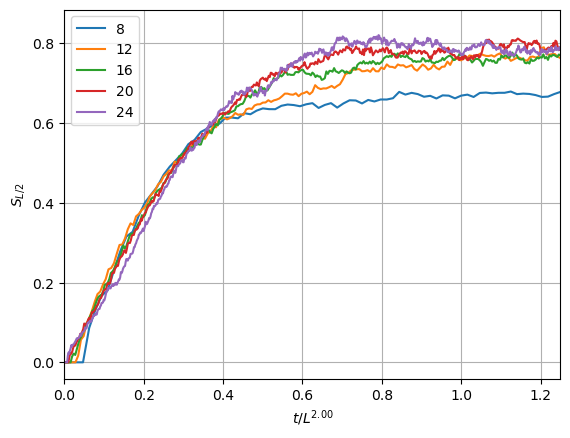

In [147]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.0).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{L/2}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

In [317]:
dc=DataCollapse(df=df_1_3_T,params={'Metrics':'EE','p_proj':0,'p_ctrl':0.5},Lmin=12,Lmax=20,p_range=[0.032,0.4],p_='T',L_='L',adaptive_func= lambda x,y: (x-1)*(y)**(-2.))
dc.datacollapse(nu=-1/2.2,p_c=1e-9,p_c_vary=False,nu_range=(-1.5,-0),max_nfev=10000,ftol=1e-14,xtol=1e-14)

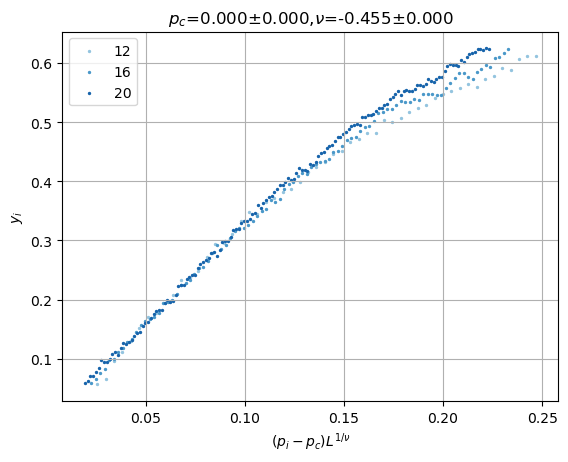

In [318]:
dc.plot_data_collapse(s=2)

In [189]:
dc.res.ier

2

Text(0.5, 0, '$t/L^{2.00}$')

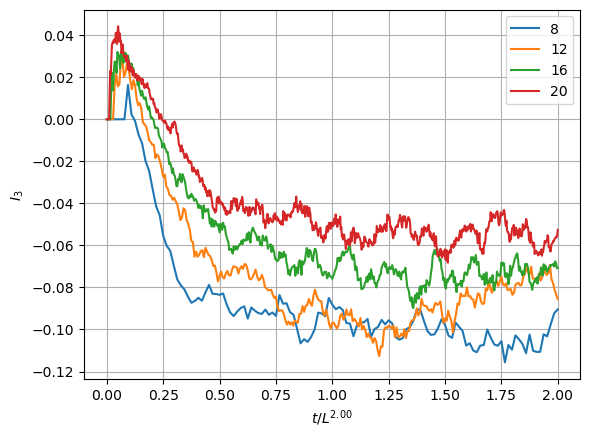

In [21]:
L_list=[8,12,16,20,]
fig,ax=plt.subplots()
z=2
for L in L_list:
    # data=df_1_3_T.xs(level='Metrics',key='TMI').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.0)['observations'][L]
    # t_list=np.arange(data.shape[0])
    # ax.plot(np.sqrt(t_list/L**z),data.mean(axis=-1),label=L)
    # ax.plot(((t_list-L)/L**z),data.mean(axis=-1)-0.04/20*L,'.-',label=L)
    # -0.04/20*L

    data=df_1_3_T.xs(level='Metrics',key='TMI').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.0).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(-20,70)
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$I_3$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

# MIPT @ zero control

Text(0.5, 0, '$t/L^{1.00}$')

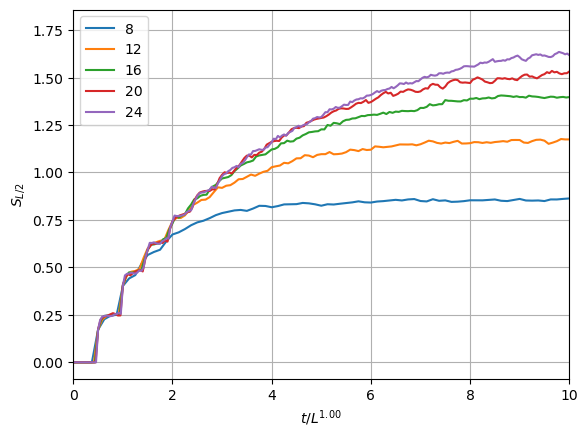

In [22]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=1
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.0).xs(level='p_proj',key=0.19).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$S_{L/2}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

Text(0.5, 0, '$t/L^{1.00}$')

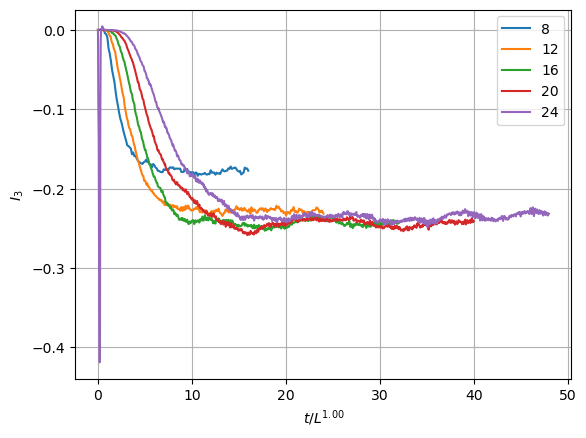

In [131]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=1
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='TMI').xs(level='p_ctrl',key=0.0).xs(level='p_proj',key=0.19)['observations'][L]
    t_list=np.arange(data.shape[0])
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel('$I_3$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

# MIPT with nu~0.7

Text(0.5, 0, '$t/L^{1.38}$')

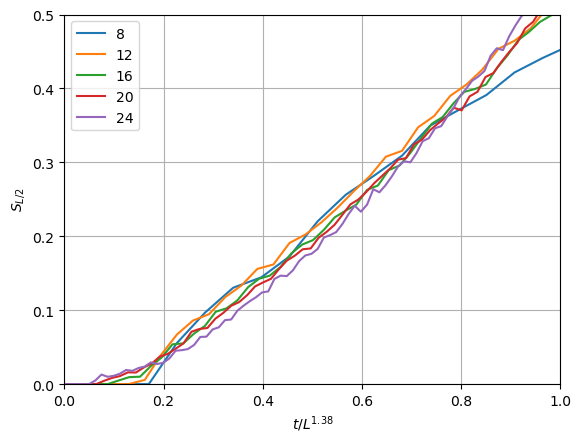

In [350]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=1.38
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.42).xs(level='p_proj',key=0.3).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_xlim(0,1)
ax.set_ylim(0,.5)
ax.set_ylabel('$S_{L/2}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

# ax.axvline(x=0.85)

In [353]:
dc=DataCollapse(df=df_1_3_T,params={'Metrics':'EE','p_proj':0.3,'p_ctrl':0.42},Lmin=12,Lmax=24,p_range=[0.2,.8],p_='T',L_='L',adaptive_func= lambda x,y: (x-1)*(y)**(-1.41))
dc.datacollapse(nu=-1/1.39,p_c=1e-9,p_c_vary=False,nu_range=(-1.5,-0),max_nfev=10000,ftol=1e-14,xtol=1e-14)

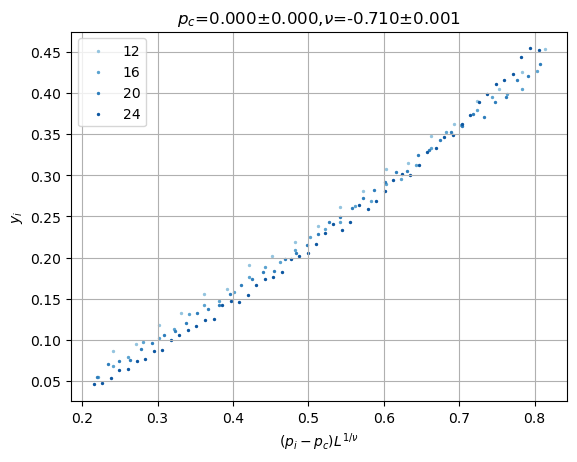

In [354]:
dc.plot_data_collapse(s=2)

In [ ]:
z=-1/nu

In [ ]:
dz=-(-1)nu^(-2)d nu

In [355]:
-(dc.res.params['nu'].value)**(-1.)

1.4094208397980956

In [356]:
(dc.res.params['nu'].value)**(-1.)*dc.res.params['nu'].stderr

-0.0014234875147525732

In [345]:
dc.res.params['nu'].stderr

0.0005119725419198015

In [ ]:
may be try one more?
or equivalently you can try another volume law

Text(0.5, 0, '$t/L^{1.38}$')

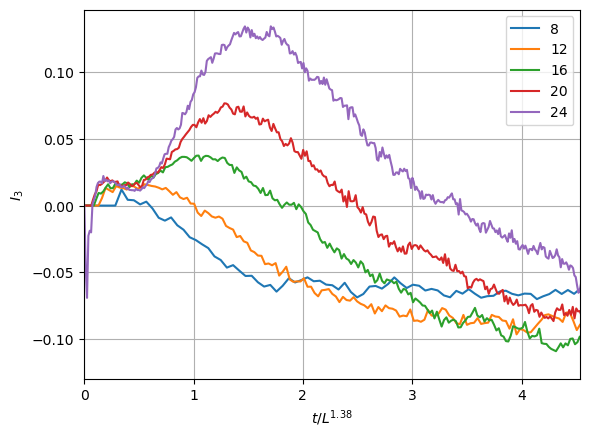

In [133]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=1.38
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='TMI').xs(level='p_ctrl',key=0.42).xs(level='p_proj',key=0.3)['observations'][L]
    t_list=np.arange(data.shape[0])
    # ax.errorbar(np.log(t_list/L**z+1),data.mean(axis=-1),data.std(axis=-1)/np.sqrt(data.shape[-1]),label=L,capsize=3)
    ax.plot((t_list/L**z),data.mean(axis=-1),label=L)
ax.legend()
ax.grid('on')
ax.set_xlim(0,80/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$I_3$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

# ax.axvline(x=0.85)

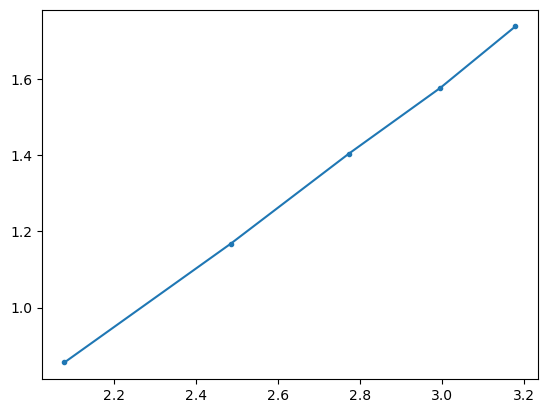

In [166]:
plt.plot(np.log(L_list),[df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.).xs(level='p_proj',key=0.19)['observations'][L].mean(axis=-1)[-1] for L in L_list],'.-')

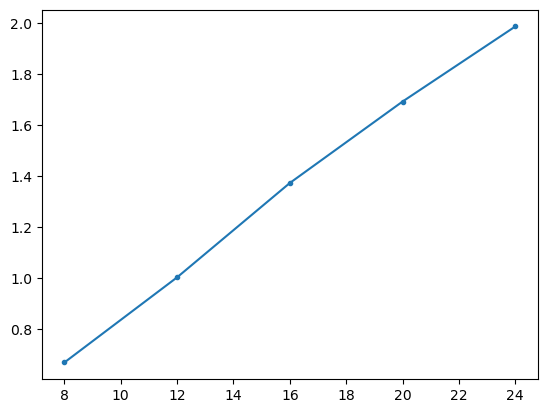

In [167]:
plt.plot((L_list),[df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.42).xs(level='p_proj',key=0.3)['observations'][L].mean(axis=-1)[-1] for L in L_list],'.-')

In [135]:
1. How "early stage is defined"? []
3. if not at critcality , it does not collapse?
4. how TMI can collapse?
2. it seems that the second crossing scale log


SyntaxError: invalid syntax (4143808180.py, line 1)

In [15]:
zz=df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.42).xs(level='p_proj',key=0.3)

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.0,p_c=0.488,p_c_vary=False)

In [ ]:
df_1_3_T.index

In [17]:
zz.index.get_level_values('L')

Int64Index([16, 8, 12, 20, 24], dtype='int64', name='L')

In [ ]:
(zz.index.get_level_values('t').values)

In [181]:
zz.iloc[0]

tensor([[ 2.1138e-32,  2.1138e-32,  2.1138e-32,  ...,  2.1138e-32,
          2.1138e-32,  2.1138e-32],
        [ 2.1138e-32, -2.3842e-07,  2.1138e-32,  ..., -2.3842e-07,
          2.1138e-32,  2.1138e-32],
        [ 2.1138e-32,  2.3842e-07,  3.8535e-15,  ...,  2.1138e-32,
          2.1138e-32,  2.1138e-32],
        ...,
        [ 2.6958e+00,  3.2175e+00,  1.9062e-01,  ...,  2.2339e+00,
          1.6477e+00,  1.4904e+00],
        [ 2.8680e+00,  2.8008e+00,  1.0043e+00,  ...,  2.1803e+00,
          1.0951e+00,  1.7449e+00],
        [ 2.4889e+00,  2.9946e+00,  1.2492e+00,  ...,  1.9674e+00,
          1.1178e+00,  1.5220e+00]])

In [182]:
zz.iloc[0].shape

torch.Size([513, 2000])

# Vol law @ (p_ctrl,p_proj)=(0.3,0)

Text(0.5, 0, '$t/L^{1.00}$')

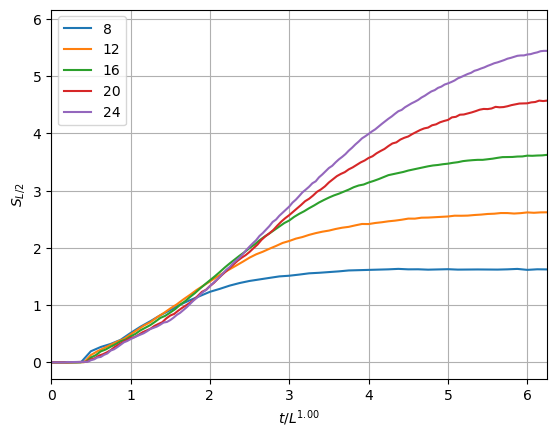

In [25]:
L_list=[8,12,16,20,24]
fig,ax=plt.subplots()
z=1
for L in L_list:
    data=df_1_3_T.xs(level='Metrics',key='EE').xs(level='p_ctrl',key=0.3).xs(level='p_proj',key=0.).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)

ax.legend()
ax.grid('on')
ax.set_xlim(0,50/L_list[0]**z)
# ax.set_ylim(0,1.5)
ax.set_ylabel('$S_{L/2}$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

# ax.axvline(x=0.85)

In [2]:
L_list=[8,12]

In [3]:
rs={}
t_list={}
for L in L_list:
    with open(f'CT_En2000_pctrl(0.50,0.50,1)_pproj(0.00,0.00,1)_L({L},{L+2},2)_xj(1-3,2-3)_seed0_64_T.pickle','rb') as f:
        rs[L]=pickle.load(f)
        t_list[L]=np.arange(2*L**2+1)

In [4]:
rs1={}
t_list={}
for L in L_list:
    with open(f'CT_En2000_pctrl(0.42,0.42,1)_pproj(0.30,0.30,1)_L({L},{L+2},2)_xj(1-3,2-3)_seed0_64_T.pickle','rb') as f:
        rs1[L]=pickle.load(f)
        t_list[L]=np.arange(2*L**2+1)

In [5]:
rs2={}
t_list={}
for L in L_list:
    with open(f'CT_En2000_pctrl(0.00,0.00,1)_pproj(0.19,0.19,1)_L({L},{L+2},2)_xj(1-3,2-3)_seed0_64_T.pickle','rb') as f:
        rs2[L]=pickle.load(f)
        t_list[L]=np.arange(2*L**2+1)

In [6]:
rs[12]['TMI'].shape

torch.Size([1, 1, 1, 289, 2000])

In [8]:
import matplotlib.pyplot as plt

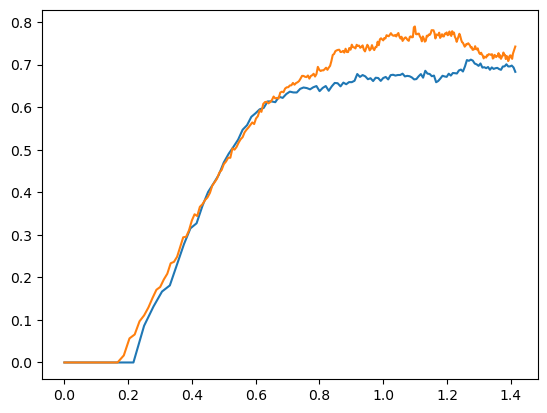

In [9]:
for L in L_list:
    plt.plot(np.sqrt(t_list[L]/(L**2)),rs[L]['EE'].mean(axis=-1).flatten())

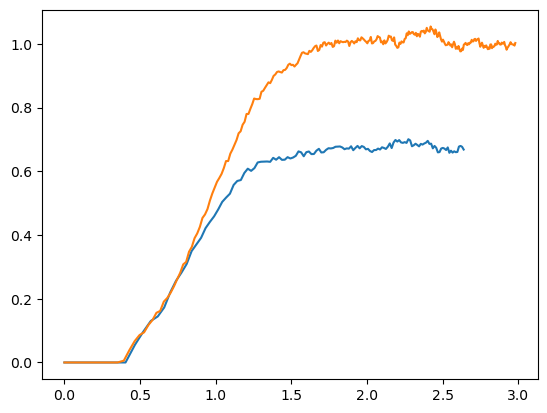

In [10]:
for L in L_list:
    plt.plot(np.sqrt(t_list[L]/(L**1.4)),rs1[L]['EE'].mean(axis=-1).flatten())

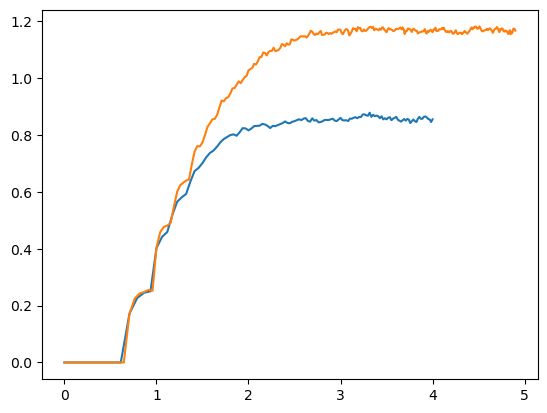

In [11]:
for L in L_list:
    plt.plot(np.sqrt(t_list[L]/(L**1)),rs2[L]['EE'].mean(axis=-1).flatten())

/home/hnpan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torch/_tensor.py:972: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


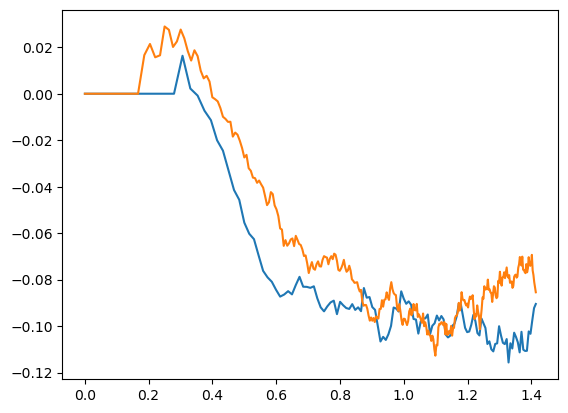

In [75]:

for L in L_list:
    plt.plot(np.sqrt(t_list[L]/(L**2)),rs[L]['TMI'].mean(axis=-1).flatten())